## Supervised Learning Capstone: Diabetic patient readmission prediction

### Background

#### This dataset is acquired from Kaggle. The dataset is composed of integrated data from 130 U.S. hospitals over the course of 10 years. It includes over 50 features such as length of stay, medications, lab results and primary diagnosis. In the healthcare field, determing the chances of a patient readmission is vital. If risks for readmission is known, better treatment plan can be created for patients. 

In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as stats
import seaborn as sns
import time
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [3]:
diabetes= pd.read_csv('diabetic_data1.csv')
#preview of dataset
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#let's explore data!
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [5]:
diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


## Data Exploration and Visualization

In [6]:
#looking for nulls
diabetes.isnull().sum()*100/len(diabetes)

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
weight                      0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
payer_code                  0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburid

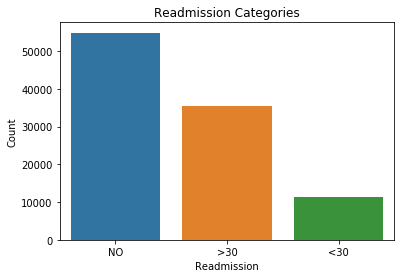

In [7]:
#type of readmission categories
sns.countplot(diabetes.readmitted)
plt.xlabel('Readmission')
plt.ylabel('Count')
plt.title('Readmission Categories')
plt.show()


In [8]:
diabetes.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

### For our desired outcome, I choose to predict readmission for patients within 30 days of previous admission.


In [9]:
#creating our target variable
diabetes['target'] = (diabetes.readmitted == '<30').astype('int')

In [10]:
percentage= diabetes.target.sum()*100/len(diabetes)
print('Our target variable is only {0:.2f}% . This means we have a class imbalance'.format(percentage))

Our target variable is only 11.16% . This means we have a class imbalance


### We can see that there is a class imbalance, with most of our patients not being readmitted. We will look at this variable in a little while. 

### It's saying there are no null values, but we can see there are '?' values. Let's dig deeper and separate our categorical from our numerical values.

In [11]:
#Let's look at categorical columns first. 
cat_cols= diabetes.select_dtypes(include=['object'])

In [12]:
#looking for ? values.
for col in diabetes.columns:
    if diabetes[col].dtype == object:
         print(col,diabetes[col][diabetes[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


### A look at the race/ethnicity

In [13]:
#replace '?' with other
diabetes.race.replace('?', 'Other', inplace=True)
diabetes.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: race, dtype: int64

In [28]:
diabetes[diabetes.race == 'Caucasian'].target.value_counts()

0    67507
1     8592
Name: target, dtype: int64

In [27]:
diabetes[diabetes.race == 'AfricanAmerican'].target.value_counts()

0    17055
1     2155
Name: target, dtype: int64

In [29]:
diabetes[diabetes.race == 'Hispanic'].target.value_counts()

0    1825
1     212
Name: target, dtype: int64

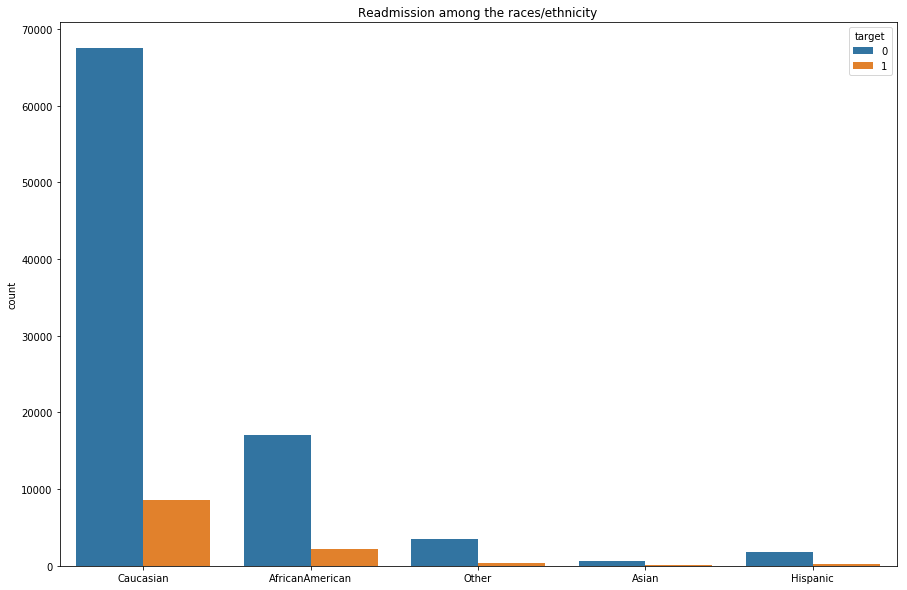

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(x="race", hue='target',
             data=diabetes)
plt.title('Readmission among the races/ethnicity')
plt.xlabel('')
plt.show()

### Readmission is highest among Caucasian, but the prevalance among 

### Examining the weight

In [14]:
#percentage of missing values
missing_weight= diabetes[(diabetes.weight=='?')].shape[0]*100/len(diabetes)
missing_payer_code=diabetes[(diabetes.payer_code=='?')].shape[0]*100/len(diabetes)
missing_med_spec=diabetes[(diabetes.medical_specialty=='?')].shape[0]*100/len(diabetes)

print ('Weight has {:.2f}% missing. Payer code has {:.2f}% missing and medical specialty has {:.2f}% missing'.format
(missing_weight, missing_payer_code,missing_med_spec))


Weight has 96.86% missing. Payer code has 39.56% missing and medical specialty has 49.08% missing


In [ ]:
#here I'm dropping columns that have plenty of missing values. Weight would have been ideal as 
#demographic variable, unfortunately, 96% of data is missing.
diabetes = diabetes.drop(['medical_specialty','payer_code','weight'],axis=1)

### What about gender?

In [16]:
diabetes.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [ ]:
#changed gender value 'Unknown/Invalid' to majority since there were only three missing. 
diabetes.gender.replace('Unknown/Invalid', 'Female', inplace=True)
diabetes.gender.value_counts()

### And age? 

In [18]:
diabetes.age.value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [30]:
#replacing age groups into one number
new_age = {'[0-10)':0, 
          '[10-20)':10, 
          '[20-30)':20, 
          '[30-40)':30, 
          '[40-50)':40, 
          '[50-60)':50,
          '[60-70)':60, 
          '[70-80)':70, 
          '[80-90)':80, 
          '[90-100)':90}
diabetes['age_group'] = diabetes.age.replace(new_age)

### Examining other factors

In [20]:
diabetes.max_glu_serum.value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [21]:
diabetes.A1Cresult.value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [1]:
print(diabetes[diabetes.A1Cresult == '>8'].readmitted.value_counts())
print ('')
print ('Out of 101766, 8,216 patients have elevated HgA1C. 3,712 patients were readmitted either 30 days after\nprevious admission or prior to 30 days')

NameError: name 'diabetes' is not defined

In [76]:
diabetes[diabetes.A1Cresult == '>7'].readmitted.value_counts()

NO     2129
>30    1300
<30     383
Name: readmitted, dtype: int64

In [77]:
diabetes[diabetes.A1Cresult == 'Norm'].readmitted.value_counts()

NO     2909
>30    1599
<30     482
Name: readmitted, dtype: int64

In [59]:
#average
avg_age_highA1C=diabetes[(diabetes.A1Cresult == '>8') & (diabetes.readmitted == '<30')].age_group.mean()
print

In [617]:
#creating new df for list of medications
newdf = diabetes.iloc[0:, 24:47]
newdf['target']=diabetes.target

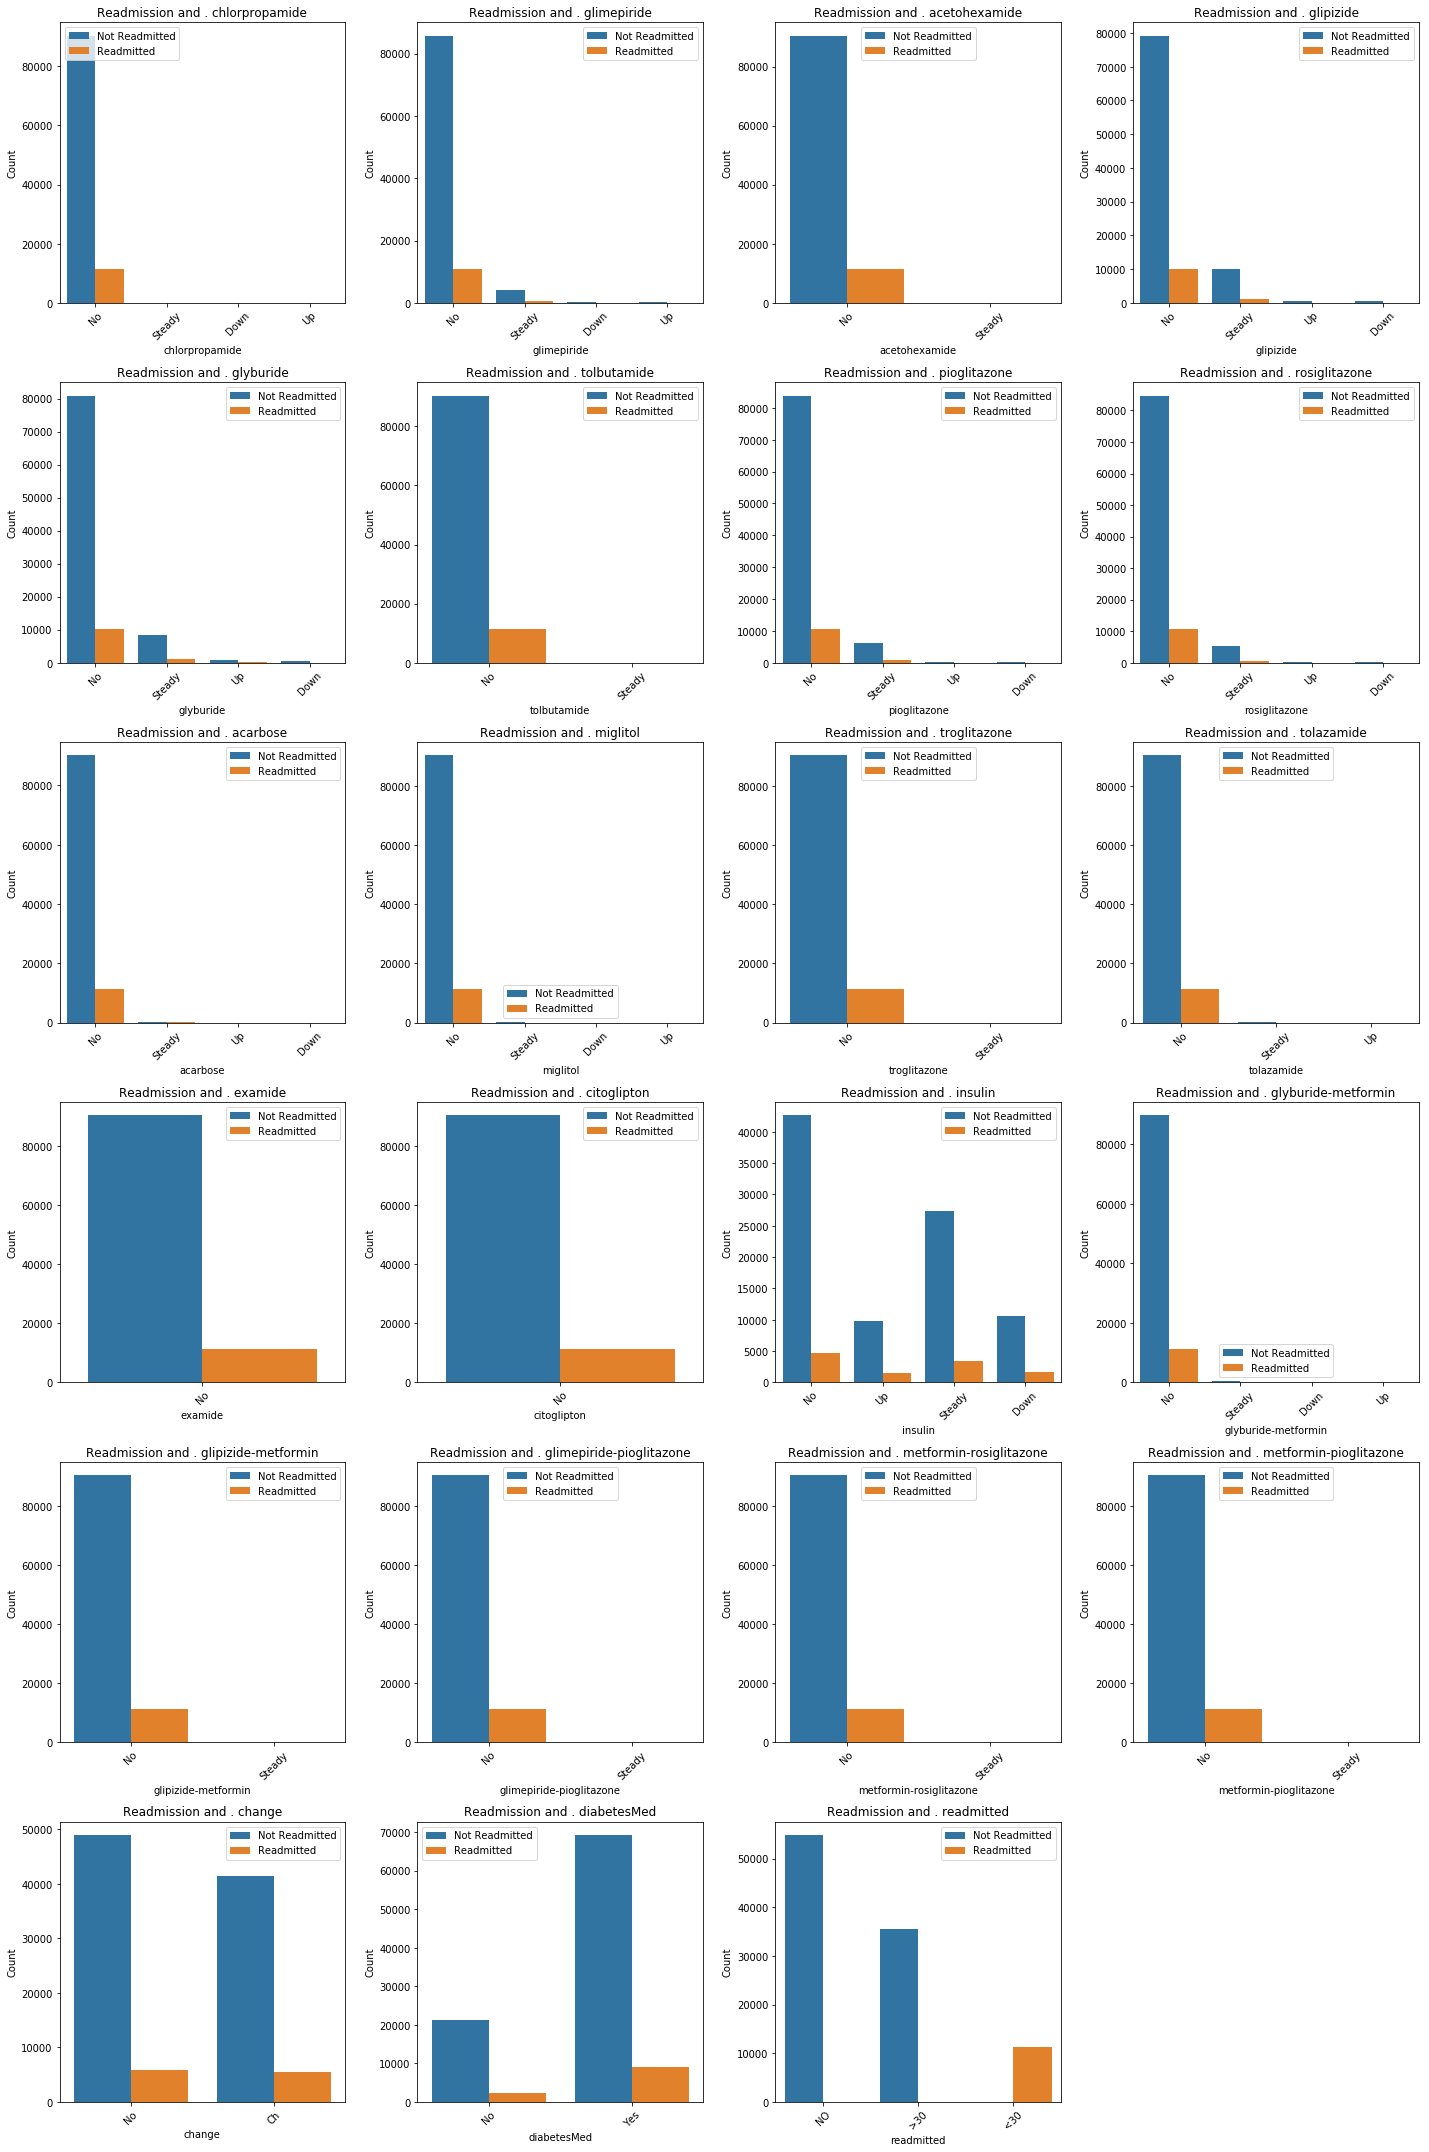

In [618]:
#Visualize medications and target
df = newdf.select_dtypes(['object'])

plt.figure( i, figsize=(20, 30))

for i, col in enumerate(df.columns):
    plt.subplot(6,4, i+1)
    sns.countplot(x=col, hue=newdf.target, data=df)      
    plt.title('Readmission and . {}'.format(col))
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation='45')
    plt.legend(['Not Readmitted','Readmitted'])
plt.tight_layout()
plt.show()

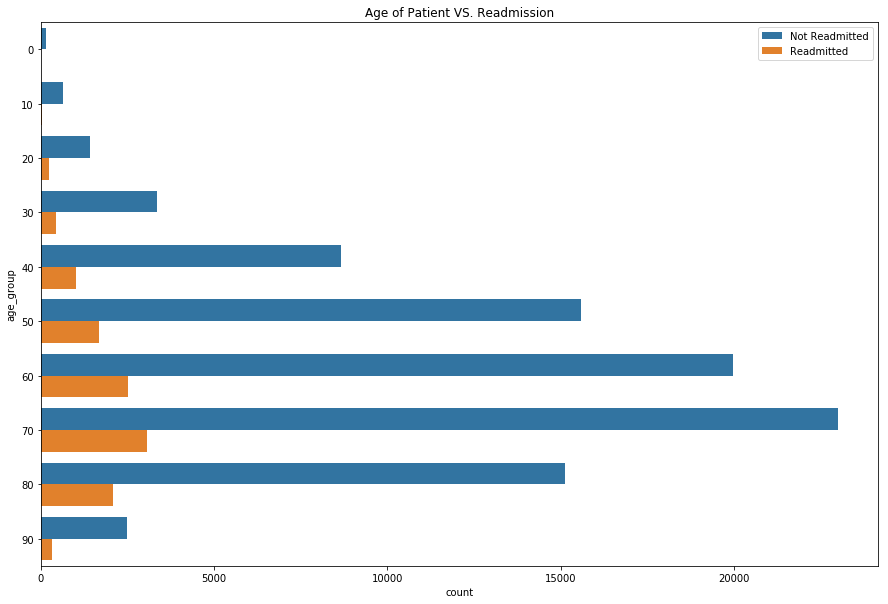

In [619]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= diabetes['age_group'], hue = diabetes['target']).set_title('Age of Patient VS. Readmission')
plt.legend(['Not Readmitted','Readmitted'])
plt.show()

In [620]:
#created diagnosis count columns
w = pd.DataFrame(diabetes.diag_1.value_counts())
w1 = map(lambda x: x if (x>=250) else 'Other', w['diag_1'])
w1 = pd.DataFrame(w1, columns={'diag_count1'})
w1.set_index(w.index, inplace=True)
diabetes= diabetes.merge(w1, how='left', left_on='diag_1', right_index=True)

In [621]:
w = pd.DataFrame(diabetes.diag_2.value_counts())
w2 = map(lambda x: x if (x>=250) else 'Other', w['diag_2'])
w2 = pd.DataFrame(w2, columns={'diag_count2'})
w2.set_index(w.index, inplace=True)
diabetes= diabetes.merge(w2, how='left', left_on='diag_2', right_index=True)

In [622]:
w = pd.DataFrame(diabetes.diag_3.value_counts())
w3 = map(lambda x: x if (x>=250) else 'Other', w['diag_3'])
w3 = pd.DataFrame(w3, columns={'diag_count3'})
w3.set_index(w.index, inplace=True)
diabetes= diabetes.merge(w3, how='left', left_on='diag_3', right_index=True)

In [623]:
count1=diabetes.diag_1.value_counts().head(10)
icd_9_values= pd.DataFrame(count1,)
icd_9_values.reset_index(level=0, inplace=True)
icd_9_values['Diagnosis']= ['Heart Failure', 'Other forms of Chronic Heart Disease',
                            'Symptoms involving respiratory system and other chest symptoms',
                            'Myocardial infarcation', 'Pneumonia', 'Cardiac Dysrythmias', 
                            'Emphysema', 'Osteoarthritis', 'Cellulitis', 'General Symptoms']

icd_9_values.rename(columns={'index': 'ICD_code', 'diag_1': 'count'}, inplace=True)
cols = list(icd_9_values.columns)
cols = [cols[-1]] + cols[:-1]
icd_9_values = icd_9_values[cols]
icd_9_values

,Diagnosis,ICD_code,count
0,Heart Failure,428,6862
1,Other forms of Chronic Heart Disease,414,6581
2,Symptoms involving respiratory system and othe...,786,4016
3,Myocardial infarcation,410,3614
4,Pneumonia,486,3508
5,Cardiac Dysrythmias,427,2766
6,Emphysema,491,2275
7,Osteoarthritis,715,2151
8,Cellulitis,682,2042
9,General Symptoms,434,2028


In [624]:
count2=diabetes.diag_2.value_counts().head(10)
icd_9_values2= pd.DataFrame(count2,)
icd_9_values2.reset_index(level=0, inplace=True)
icd_9_values2['2nd_diagnosis']= ['Disorders of fluid electrolyte and acid-base balance', 'Heart Failure',
                            'Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled',
                             'Cardiac Dysrythmias', 'Essential Hypertension', 'Chronic airway obstruction, not elsewhere classified', 
                             'Other disorders of urethra and urinary tract','Hypertensive chronic kidney disease', 
                             'Other forms of chronic ischemic heart disease', 'Other acute and subacute forms of ischemic heart disease']

icd_9_values2.rename(columns={'index': 'ICD_code', 'diag_2': 'count'}, inplace=True)
cols = list(icd_9_values2.columns)
cols = [cols[-1]] + cols[:-1]
icd_9_values2 = icd_9_values2[cols]
icd_9_values2

,2nd_diagnosis,ICD_code,count
0,Disorders of fluid electrolyte and acid-base b...,276,6752
1,Heart Failure,428,6662
2,Diabetes mellitus without mention of complicat...,250,6071
3,Cardiac Dysrythmias,427,5036
4,Essential Hypertension,401,3736
5,"Chronic airway obstruction, not elsewhere clas...",496,3305
6,Other disorders of urethra and urinary tract,599,3288
7,Hypertensive chronic kidney disease,403,2823
8,Other forms of chronic ischemic heart disease,414,2650
9,Other acute and subacute forms of ischemic hea...,411,2566


In [625]:
count3=diabetes.diag_3.value_counts().head(10)
icd_9_values3= pd.DataFrame(count3,)
icd_9_values3.reset_index(level=0, inplace=True)
icd_9_values3['Other_diagnosis']= ['Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled',
                            'Essential Hypertension', ' \Disorders of fluid electrolyte and acid-base balance', 'Heart Failure', 'Cardiac Dysrythmias', 
                            'Other forms of chronic ischemic heart disease', 'Chronic airway obstruction, not elsewhere classified', 
                            'Hypertensive chronic kidney disease', 'Chronic Kidney Disease', 'Disorders of lipoid metabolism']

icd_9_values3.rename(columns={'index': 'ICD_code', 'diag_3': 'count'}, inplace=True)
cols = list(icd_9_values3.columns)
cols = [cols[-1]] + cols[:-1]
icd_9_values3 = icd_9_values3[cols]
icd_9_values3

,Other_diagnosis,ICD_code,count
0,Diabetes mellitus without mention of complicat...,250,11555
1,Essential Hypertension\t,401,8289
2,Disorders of fluid electrolyte and acid-base ...,276,5175
3,Heart Failure,428,4577
4,Cardiac Dysrythmias,427,3955
5,Other forms of chronic ischemic heart disease,414,3664
6,"Chronic airway obstruction, not elsewhere clas...",496,2605
7,Hypertensive chronic kidney disease,403,2357
8,Chronic Kidney Disease,585,1992
9,Disorders of lipoid metabolism,272,1969


### It is a bit surprising to see that the top 10 primary diagnosis does not include diabetes. Heart failure is the most common diagnosis, followed by other cardiac related diseases. Secondary diagnosis lists diabetes as the third most common diagnosis, while other diagnosis lists it as first. It is very interesting to see that there are more heart conditions as primary diagnosis. We will add the primary diagnosis in our models and look for a connection.

In [626]:
#icd9_Counts= diabetes.loc[:,['diag_1', 'diag_2', 'diag_3', 'diag_count1', 'diag_count2', 'diag_count3']]
#icd9_Counts.head()

In [627]:
#selection of interesting categorical values.
cat_cols = ['race', 'gender', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'diag_count1']

### I want to seperate my numerical values from my categorical values. 

In [628]:
#Let's look at numerical values. 
num_cols= diabetes.select_dtypes(include=['int', 'float'])
num_cols.isnull().sum().sort_values(ascending=False)

age_group                   0
target                      0
number_diagnoses            0
number_inpatient            0
number_emergency            0
number_outpatient           0
num_medications             0
num_procedures              0
num_lab_procedures          0
time_in_hospital            0
admission_source_id         0
discharge_disposition_id    0
admission_type_id           0
patient_nbr                 0
encounter_id                0
dtype: int64

In [629]:
#making sure there is no '?' in variables.
for col in diabetes.columns:
    if diabetes[col].dtype == int:
         print(col,diabetes[col][diabetes[col] == '?'].count())

encounter_id 0
patient_nbr 0
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
number_diagnoses 0
target 0
age_group 0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


### I will not use encounter ID and patient_nbr since these are just patient identifiers.  I will create seperate features for admission source and type and discharge disposition.

In [630]:
new_num_cols= ['number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient', 'num_medications',
               'num_procedures', 'num_lab_procedures', 'time_in_hospital']

### Based on the seperate file for mapping admission_type_id, discharge_disposition and admission_source_id, there are some patients whose dispositions are expired or are on hospice care. We will drop those since there is no chance of a patient being readmitted.  

In [631]:
diabetes= diabetes.loc[~diabetes.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [632]:
diabetes.discharge_disposition_id.unique()

array([25,  1,  3,  6,  2,  5,  7, 10,  4, 18,  8, 12, 16, 17, 22, 23,  9,
       15, 24, 28, 27])

In [633]:
#I want to create dummy variable for these 3 columns, making them into strings first. 
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

diabetes[cols_cat_num] = diabetes[cols_cat_num].astype('str')


In [634]:
df_cat = pd.get_dummies(diabetes[cat_cols + cols_cat_num ],drop_first = True)
diabetes = pd.concat([diabetes,df_cat], axis = 1)

In [635]:
cols_all_cat = list(df_cat.columns)

In [636]:
#creating the new data frame.
extra_feat= ['age_group']
useful_cols = extra_feat + cols_all_cat + new_num_cols
df_data = diabetes[useful_cols + ['target']]

In [637]:
#looking at chi-squared
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [ ]:
cT = ChiSquare(df_data)
for var in useful_cols:
    cT.TestIndependence(colX=var,colY="target" ) 

In [638]:
#reducing features that are not important based on chi-squared tests
df_data.drop(['max_glu_serum_Norm', 'nateglinide_No', 'nateglinide_Steady', 'nateglinide_Up', 'chlorpropamide_No', 
'chlorpropamide_Steady','chlorpropamide_Up','glimepiride_Up', 
'acetohexamide_Steady','glipizide_No', 'glipizide_Steady', 
'glipizide_Up','glyburide_Steady','glyburide_Up',
'tolbutamide_Steady', 'pioglitazone_Up' ,'rosiglitazone_Up', 'acarbose_No','acarbose_Steady','acarbose_Up' ,'miglitol_No' ,
'miglitol_Steady', 'miglitol_Up' ,'troglitazone_Steady','tolazamide_Steady', 'tolazamide_Up' ,'insulin_Steady' ,
'glyburide-metformin_No' ,'glyburide-metformin_Steady' ,'glyburide-metformin_Up' ,'glipizide-metformin_Steady', 'glimepiride-pioglitazone_Steady', 
'metformin-rosiglitazone_Steady', 'metformin-pioglitazone_Steady','diag_count1_262' ,'diag_count1_267' ,'diag_count1_276' ,'diag_count1_286' ,
'diag_count1_288' ,'diag_count1_311' ,'diag_count1_313','diag_count1_316','diag_count1_319',
'diag_count1_335','diag_count1_339','diag_count1_346','diag_count1_350',
'diag_count1_365' ,'diag_count1_367' ,'diag_count1_417' ,'diag_count1_424' ,'diag_count1_425' ,
'diag_count1_426' ,'diag_count1_440' ,'diag_count1_447' ,'diag_count1_449' ,'diag_count1_450' ,
'diag_count1_515' ,'diag_count1_531', 'diag_count1_546','diag_count1_561','diag_count1_663' ,
'diag_count1_784','diag_count1_789' ,'diag_count1_851','diag_count1_876' ,'diag_count1_896',
'diag_count1_1115','diag_count1_1595' ,'diag_count1_1680','diag_count1_1688','diag_count1_3614', 
'diag_count1_Other' ,'admission_type_id_2' ,'admission_type_id_4' ,'admission_type_id_5' ,'admission_type_id_6' ,
'admission_type_id_7', 'admission_type_id_8' ,'discharge_disposition_id_10' ,'discharge_disposition_id_16' ,
'discharge_disposition_id_17' ,'discharge_disposition_id_24' ,'discharge_disposition_id_27','discharge_disposition_id_4', 
'discharge_disposition_id_8','admission_source_id_10' ,'admission_source_id_11' ,'admission_source_id_13' ,
'admission_source_id_14','admission_source_id_17', 'admission_source_id_20' ,'admission_source_id_22' ,
'admission_source_id_25' ,'admission_source_id_3' ,'admission_source_id_5' ,'admission_source_id_8',
'admission_source_id_9'], axis=1, inplace=True)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [639]:
new_cat_cols = ['race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_Male','max_glu_serum_>300', 'max_glu_serum_None', 'A1Cresult_>8', 'A1Cresult_None',
                'A1Cresult_Norm', 'metformin_No','metformin_Steady','metformin_Up', 'repaglinide_No',
               'repaglinide_Steady', 'repaglinide_Up','glimepiride_No', 'glimepiride_Steady', 'glyburide_No', 
               'pioglitazone_No','pioglitazone_Steady','rosiglitazone_No', 'rosiglitazone_Steady', 
               'insulin_No', 'insulin_Up', 'change_No','diabetesMed_Yes', 'diag_count1_257','diag_count1_270',
               'diag_count1_277', 'diag_count1_285', 'diag_count1_320', 'diag_count1_379', 'diag_count1_412',
               'diag_count1_513','diag_count1_610', 'diag_count1_625','diag_count1_675', 'diag_count1_771',
               'diag_count1_840', 'diag_count1_871','diag_count1_965', 'diag_count1_989', 'diag_count1_1016', 
                'diag_count1_1056', 'diag_count1_1057', 'diag_count1_1082', 'diag_count1_1183',
                'diag_count1_1207', 'diag_count1_1520', 'diag_count1_1889', 'diag_count1_1967','diag_count1_2019', 
                'diag_count1_2028', 'diag_count1_2042' ,'diag_count1_2151', 'diag_count1_2275','diag_count1_2766',
                'diag_count1_3508', 'diag_count1_4016', 'diag_count1_6581', 'diag_count1_6862', 'admission_type_id_3',
                'discharge_disposition_id_12', 'discharge_disposition_id_15', 'discharge_disposition_id_18', 
               'discharge_disposition_id_2', 'discharge_disposition_id_22', 'discharge_disposition_id_23',
               'discharge_disposition_id_25','discharge_disposition_id_28', 'discharge_disposition_id_3', 
               'discharge_disposition_id_5','discharge_disposition_id_6', 'discharge_disposition_id_7',
               'discharge_disposition_id_9','admission_source_id_4', 'admission_source_id_6','admission_source_id_7',
               'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient', 'number_outpatient',
                'num_medications', 'num_procedures', 'num_lab_procedures', 'time_in_hospital']



In [795]:
df_data.shape

(99343, 90)

In [640]:
from sklearn.feature_selection import SelectKBest, chi2



# Perform feature selection
selector = SelectKBest(chi2, k=10)
X=df_data[new_cat_cols]
y=df_data['target']
selectbest= selector.fit(X, y)

#X_kbest_features = chi2_features.fit_transform(X, y)


X_skbest = selector.transform(X)
print(X_skbest.shape)

X.columns[selector.get_support(indices=True)].tolist()

(99343, 10)


['discharge_disposition_id_22',
 'discharge_disposition_id_3',
 'number_diagnoses',
 'number_inpatient',
 'number_emergency',
 'number_outpatient',
 'number_outpatient',
 'num_medications',
 'num_lab_procedures',
 'time_in_hospital']

### Splitting data: I created a train/validation/test split.  I split my data into 70% train, 15% validation and %15 test. I also balanced the data since we have a class imbalance problem, with our target only 11% positive.

In [1]:
#shuffle data first to make sure that there is no particular order
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)


NameError: name 'df_data' is not defined

In [642]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [643]:
#splitting test and validation set to 50%.
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [644]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [645]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.target.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.target.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.target.values)))

Test prevalence(n = 14902):0.117
Valid prevalence(n = 14901):0.113
Train all prevalence(n = 69540):0.113


In [646]:
#making sure all sample was used
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all))

all samples (n = 99343)


In [647]:
# split the training data into positive and negative
rows_pos = df_train_all.target == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.target.values)))


Train balanced prevalence(n = 15766):0.500


In [648]:
#saving data
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [649]:
X_train = df_train[new_all_cols].values
X_train_all = df_train_all[new_all_cols].values
X_valid = df_valid[new_all_cols].values

y_train = df_train['target'].values
y_valid = df_valid['target'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (69540, 88)
Training shapes: (15766, 88) (15766,)
Validation shapes: (14901, 88) (14901,)


In [650]:
#scaling data
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [651]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [652]:
scaler = pickle.load(open(scalerfile, 'rb'))

In [653]:
#transforming x train and x valid
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

### Baseline Models.

#### I've decided to use 6 different models to try out: KNN, Logistic Regression, Naive Bayes, Decision Trees, Random Forest and Gradient Boosting Classifier. 

In [790]:
#importing scores
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

def f1_score(y_actual, y_pred, thresh):
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    return 2*((precision*recall)/(precision+recall))
#setting threshold to 50% since our data is now balanced 
thresh = 0.5


### SVC Baseline Model

In [459]:
from sklearn.svm import SVC 
svc = SVC(kernel='linear', probability=True) 
svc.fit(X_train_tf, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [755]:
y_train_preds = svc.predict_proba(X_train_tf)[:,1]
y_valid_preds = svc.predict_proba(X_valid_tf)[:,1]

print('SVC')
print('Training:')
svc_train_auc, svc_train_accuracy, svc_train_recall, \
    svc_train_precision, svc_train_specificity= print_report(y_train,y_train_preds, thresh)

svc_train_f1=f1_score(y_train,y_train_preds, thresh)
print('svc f1:%.3f'%(svc_train_f1))

print('Validation:')
svc_valid_auc, svc_valid_accuracy, svc_valid_recall, \
    svc_valid_precision, svc_valid_specificity= print_report(y_valid,y_valid_preds, thresh)
svc_valid_f1=f1_score(y_valid,y_valid_preds, thresh)
print('svc f1:%.3f'%(svc_valid_f1))

SVC
Training:
AUC:0.672
accuracy:0.622
recall:0.527
precision:0.650
specificity:0.693
prevalence:0.500
 
svc f1:0.582
Validation:
AUC:0.668
accuracy:0.685
recall:0.542
precision:0.189
specificity:0.682
prevalence:0.113
 
svc f1:0.280


### KNN Baseline Model

In [461]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [732]:

y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity= print_report(y_train,y_train_preds, thresh)
knn_train_f1=f1_score(y_train,y_train_preds, thresh)
print('KNN f1:%.3f'%(knn_train_f1))
print()
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity= print_report(y_valid,y_valid_preds, thresh)
knn_valid_f1=f1_score(y_valid,y_valid_preds, thresh)
print('KNN f1:%.3f'%(knn_valid_f1))


KNN
Training:
AUC:0.652
accuracy:0.605
recall:0.518
precision:0.627
specificity:0.658
prevalence:0.500
 
KNN f1:0.567

Validation:
AUC:0.624
accuracy:0.650
recall:0.504
precision:0.163
specificity:0.637
prevalence:0.113
 
KNN f1:0.246


### Linear Regression Baseline Model

In [791]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [792]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
lr_train_f1=f1_score(y_train,y_train_preds, thresh)
print('LR f1:%.3f'%(lr_train_f1))
print()
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

lr_valid_f1=f1_score(y_valid,y_valid_preds, thresh)
print('LR f1:%.3f'%(lr_valid_f1))

Logistic Regression
Training:
AUC:0.675
accuracy:0.623
recall:0.550
precision:0.644
specificity:0.696
prevalence:0.500
 
LR f1:0.593

Validation:
AUC:0.667
accuracy:0.668
recall:0.572
precision:0.186
specificity:0.681
prevalence:0.113
 
LR f1:0.280


### Decision Trees Baseline Model

In [788]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [789]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
dt_train_f1=f1_score(y_train,y_train_preds, thresh)
print('DT f1:%.3f'%(dt_train_f1))
print()
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)
dt_valid_f1=f1_score(y_valid,y_valid_preds, thresh)
print('DT f1:%.3f'%(dt_valid_f1))

Decision Tree
Training:
AUC:0.729
accuracy:0.574
recall:0.160
precision:0.925
specificity:0.987
prevalence:0.500
 
DT f1:0.273

Validation:
AUC:0.637
accuracy:0.854
recall:0.118
precision:0.225
specificity:0.948
prevalence:0.113
 
DT f1:0.154


### Random Forest Baseline Model

In [783]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [784]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
rf_train_f1=f1_score(y_train,y_train_preds, thresh)
print('RF f1:%.3f'%(rf_train_f1))
print()
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

rf_valid_f1=f1_score(y_valid,y_valid_preds, thresh)
print('RF f1:%.3f'%(rf_valid_f1))

Random Forest
Training:
AUC:0.671
accuracy:0.519
recall:0.988
precision:0.510
specificity:0.049
prevalence:0.500
 
RF f1:0.672

Validation:
AUC:0.635
accuracy:0.150
recall:0.988
precision:0.116
specificity:0.043
prevalence:0.113
 
RF f1:0.208


### Gradient Boosting Baseline Model

In [471]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [754]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
gbc_train_f1=f1_score(y_train,y_train_preds, thresh)
print('gbc f1:%.3f'%(gbc_train_f1))
print ()
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)
gbc_valid_f1=f1_score(y_valid,y_valid_preds, thresh)
print('gbc f1:%.3f'%(gbc_valid_f1))


Gradient Boosting Classifier
Training:
AUC:0.770
accuracy:0.694
recall:0.670
precision:0.704
specificity:0.718
prevalence:0.500
 
gbc f1:0.687

Validation:
AUC:0.632
accuracy:0.614
recall:0.586
precision:0.163
specificity:0.618
prevalence:0.113
 
gbc f1:0.256


### Baseline Model Evaluation

In [585]:
df_results = pd.DataFrame({'classifier':['SVC', 'SVC', 'KNN','KNN','LR','LR','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*6,
                          'auc':[svc_train_auc, svc_valid_auc, knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[svc_train_accuracy, svc_valid_accuracy, knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[svc_train_recall, svc_valid_recall, knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[svc_train_precision, svc_valid_precision, knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[svc_train_specificity, svc_valid_specificity, knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,]})


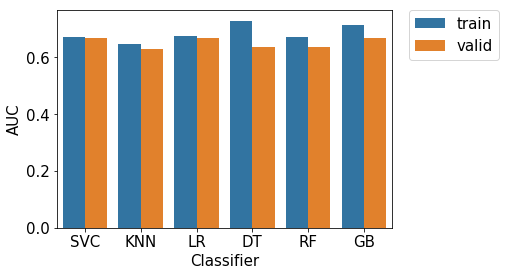

In [587]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

### Learning Curves for Models

In [474]:

import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


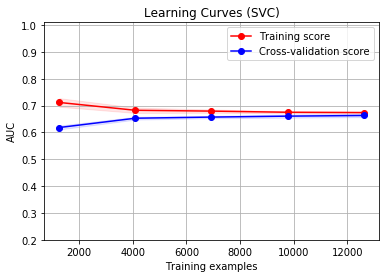

In [475]:
title = "Learning Curves (SVC)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = SVC(kernel='linear', probability=True) 
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

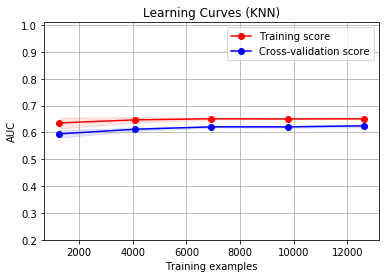

In [80]:

title = "Learning Curves (KNN)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = KNeighborsClassifier(n_neighbors = 100)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

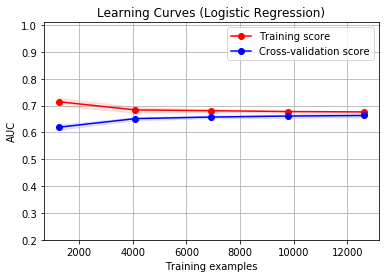

In [82]:
title = "Learning Curves (Logistic Regression)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = LogisticRegression(random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

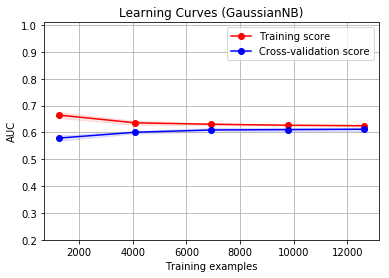

In [83]:
title = "Learning Curves (GaussianNB)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

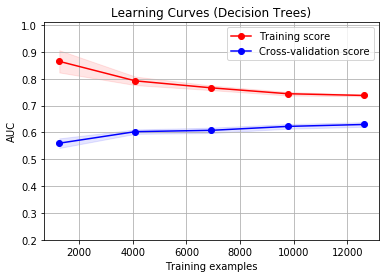

In [84]:


title = "Learning Curves (Decision Trees)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = DecisionTreeClassifier(max_depth = 10, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

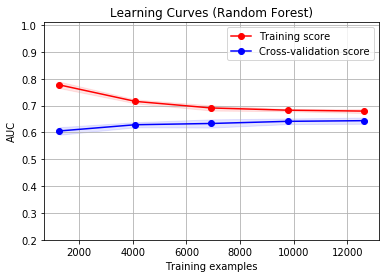

In [85]:

title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

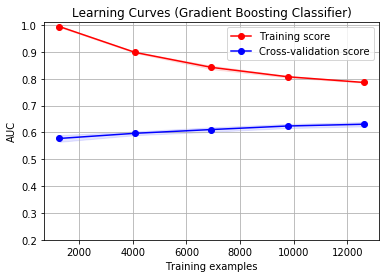

In [89]:

title = "Learning Curves (Gradient Boosting Classifier)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

### We are able to look at feature importance for both Random Forest and Logistic Regression.

In [92]:
#looking at important features
feature_importances = pd.DataFrame(lr.coef_[0],index = new_cat_cols,
                      columns=['importance']).sort_values('importance',
                      ascending=False)

In [93]:
feature_importances.head(10)

,importance
number_inpatient,0.357715
discharge_disposition_id_22,0.188475
rosiglitazone_No,0.180301
repaglinide_No,0.173352
repaglinide_Steady,0.156140
rosiglitazone_Steady,0.134689
diabetesMed_Yes,0.120780
discharge_disposition_id_3,0.119310
discharge_disposition_id_28,0.110808
discharge_disposition_id_5,0.109521


In [94]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = new_cat_cols,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [95]:

feature_importances.head(10)

,importance
number_inpatient,0.183701
time_in_hospital,0.098817
number_emergency,0.093810
discharge_disposition_id_22,0.077494
num_medications,0.057466
num_lab_procedures,0.052790
number_diagnoses,0.045715
number_outpatient,0.028754
number_outpatient,0.023830
insulin_No,0.023613


### We can see that number of inpatient and discharge disposition 22 are both showing up. It makes sense since, once a patient has been admitted, there could be a greater chance of readmission. Discharge 22 pertains to discharge to rehab, which means the patient has not recovered well enough to be sent back home. 

### Hyperparameter tuning

### SVC

In [690]:
C= [1]
kernel= ['linear']
gamma=[1]
random_grid = {'C':C,
              'kernel':kernel,
              'gamma': gamma}

print(random_grid)

{'C': [1], 'kernel': ['linear'], 'gamma': [1]}


In [691]:
svc_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid,
                               n_iter = 20, cv = 5, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

In [692]:
t1 = time.time()
svc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 28.4min finished


2292.965096950531


In [695]:

y_train_preds = svc.predict_proba(X_train_tf)[:,1]
y_valid_preds = svc.predict_proba(X_valid_tf)[:,1]

print('Baseline SVC')
svc_train_auc_base = roc_auc_score(y_train, y_train_preds)
svc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(svc_train_auc_base))
print('Validation AUC:%.3f'%(svc_valid_auc_base))

print('Optimized SVC')
y_train_preds_random = svc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random= svc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

svc_train_auc = roc_auc_score(y_train, y_train_preds_random)
svc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(svc_train_auc))
print('Validation AUC:%.3f'%(svc_valid_auc))

Baseline SVC
Training AUC:0.672
Validation AUC:0.668
Optimized SVC
Training AUC:0.672
Validation AUC:0.668


### KNN

In [549]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

n_neighbors = [200]

weights = ['uniform']

metric = ['minkowski'] 

random_grid = {'n_neighbors': n_neighbors,
                'weights': weights,
                'metric': metric,}

print(random_grid)

{'n_neighbors': [200], 'weights': ['uniform'], 'metric': ['minkowski']}


In [550]:
knn_random = RandomizedSearchCV(estimator = knn, param_distributions = random_grid,
                               n_iter = 30, cv = 7, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

In [551]:
t1 = time.time()
knn_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=30. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 7 folds for each of 1 candidates, totalling 7 fits


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.8min finished


113.09259605407715


In [570]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('Baseline KNN')
knn_train_auc_base = roc_auc_score(y_train, y_train_preds)
knn_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(knn_train_auc_base))
print('Validation AUC:%.3f'%(knn_valid_auc_base))

print('Optimized KNN')
y_train_preds_random = knn_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random= knn_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

knn_train_auc = roc_auc_score(y_train, y_train_preds_random)
knn_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(knn_train_auc))
print('Validation AUC:%.3f'%(knn_valid_auc))

Baseline KNN
Training AUC:0.652
Validation AUC:0.624
Optimized KNN
Training AUC:0.649
Validation AUC:0.629


### Logistic Regression 

In [561]:
C= [0.1]
penalty = ['l1']
max_iter = [100]
fit_intercept=[True]
class_weight= ['balanced']
dual=[False]
solver= ['liblinear']
random_grid_lr = {'C':C, 'penalty':penalty, 
                  'fit_intercept':fit_intercept, 'max_iter':max_iter,
                 'class_weight':class_weight,
                 'dual':dual, 'solver':solver}
print(random_grid_lr)

{'C': [0.1], 'penalty': ['l1'], 'fit_intercept': [True], 'max_iter': [100], 'class_weight': ['balanced'], 'dual': [False], 'solver': ['liblinear']}


In [562]:
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid_lr, 
                               n_iter = 50, cv = 10, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

In [563]:
t1 = time.time()
lr_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.3s finished


4.835694074630737


In [564]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Baseline Logistic Regression')
lr_train_auc_base = roc_auc_score(y_train, y_train_preds)
lr_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(lr_train_auc_base))
print('Validation AUC:%.3f'%(lr_valid_auc_base))

Baseline Logistic Regression
Training AUC:0.675
Validation AUC:0.667


In [565]:
print('Optimized Logistic Regression')
y_train_preds_random = lr_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = lr_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

lr_train_auc = roc_auc_score(y_train, y_train_preds_random)
lr_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(lr_train_auc))
print('Validation AUC:%.3f'%(lr_valid_auc))

Optimized Logistic Regression
Training AUC:0.675
Validation AUC:0.668


### Random Forest

In [772]:
# number of trees
n_estimators = range(200,400,200)
# maximum number of features to use at each split
max_features = ['auto']
# maximum depth of the tree
max_depth = range(1,7,1)
# minimum number of samples to split a node
min_samples_split = range(2,4,2)
# criterion for evaluating a split
criterion = ['entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 400, 200), 'max_features': ['auto'], 'max_depth': range(1, 7), 'min_samples_split': range(2, 4, 2), 'criterion': ['entropy']}


In [773]:
# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 5, scoring=auc_scoring,
                               verbose = 1, random_state = 42)


In [774]:
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   45.1s finished


46.79660606384277


In [775]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'entropy'}

In [776]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_valid_auc_base))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_valid_auc))

Baseline Random Forest
Training AUC:0.671
Validation AUC:0.635
Optimized Random Forest
Training AUC:0.679
Validation AUC:0.657


### Gradient Boosting Classifier

In [705]:
#optimize gradient booster classifier
# number of trees
n_estimators = range(100,500,100)

# maximum depth of the tree
max_depth = range(2,5,2)

# learning rate
learning_rate = [0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc,
                                n_iter = 20, cv = 5, scoring=auc_scoring,
                                verbose = 1, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 12.4min finished


752.6364250183105


In [706]:
gbc_random.best_params_

{'n_estimators': 400, 'max_depth': 2, 'learning_rate': 0.1}

In [733]:

y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Baseline Gradient Boosting Classifier')
gbc_train_auc_base = roc_auc_score(y_train, y_train_preds)
gbc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_auc_base))
print('Validation AUC:%.3f'%(gbc_valid_auc_base))

print('Optimized GBC')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

gbc_train_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_auc))
print('Validation AUC:%.3f'%(gbc_valid_auc))

Baseline Gradient Boosting Classifier
Training AUC:0.770
Validation AUC:0.632
Optimized GBC
Training AUC:0.702
Validation AUC:0.670


### Hyperparameter Tuning Results

In [793]:
df_results = pd.DataFrame({'classifier':['SVC','SVC','KNN','KNN','LR','LR','RF','RF','GB','GB'],
                           'data_set':['base','optimized']*5,
                          'auc':[svc_valid_auc_base,svc_valid_auc,
                                 knn_valid_auc_base,knn_valid_auc,
                                 lr_valid_auc_base,lr_valid_auc,
                                 rf_valid_auc_base,rf_valid_auc,
                                 gbc_valid_auc_base,gbc_valid_auc],
                          })

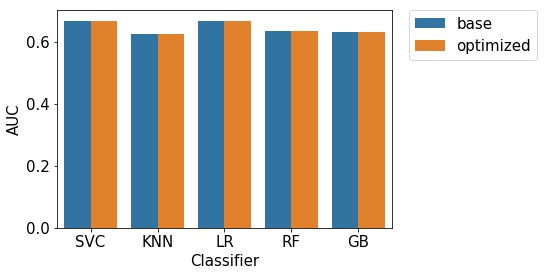

In [794]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

### Model on test evaluation

#### I chose GBC for now since it has the best AUC scores. 

In [744]:
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

In [745]:

X_test = df_test[new_cat_cols].values
y_test = df_test['target'].values

scaler = pickle.load(open('scaler.sav', 'rb'))
X_test_tf = scaler.transform(X_test)

In [746]:
best_model = pickle.load(open('best_classifier.pkl','rb'))

In [747]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [797]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)



gbc_test_f1=f1_score(y_test, y_test_preds, thresh)
print('gbc f1:%.3f'%(gbc_test_f1))

Training:
AUC:0.675
accuracy:0.623
recall:0.550
precision:0.644
specificity:0.696
prevalence:0.500
 
Validation:
AUC:0.667
accuracy:0.668
recall:0.572
precision:0.186
specificity:0.681
prevalence:0.113
 
Test:
AUC:0.670
accuracy:0.644
recall:0.590
precision:0.183
specificity:0.651
prevalence:0.117
 
gbc f1:0.280


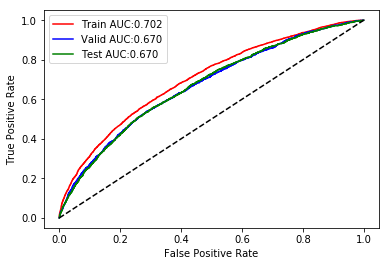

In [749]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Conclusion

#### What have we learned from exploring this dataset?
    1. There is a correlation between number of inpatient visits and being readmitted less than 30 days.
    2. A patient being discharged to the rehab or a subacute facility has a higher chance of readmission in less  than 30 days.
    3. Since many patients have a primary diagnosis of heart related conditions, it is worth looking at studying readmission rates for this population. Diabetes and heart disease have a known correlation, how does this affect readmission rates? 
    4. If the intention is to truly predict readmission for diabetic patients, it may be helpful to look at diabetes as a primary diagnosis. According to the ICD 10, primary diagnosis requires the most serious attention and is resource intesive while secondary and tertiary diagnoss could be diseases that co-exist during admission or develop thereafter admission. 
    4. Additional information may be needed for this dataset. Information such as procedures and certain blood work could provide more insight into readmission. 